In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report


league_data = pd.read_csv('./preprocessed_2023_LoL_esports_match_data_from_OraclesElixir.csv')
league_data.head()

features = ['champion', 'kills', 'deaths', 'assists', 'firstbloodkill', 'firstbloodassist', 'firstbloodvictim']
target = 'earned gpm'

def gpm_range(gpm):
    if gpm < 200:
        return 'low'
    elif 200 <= gpm < 300:
        return 'medium'
    else:
        return 'high'

league_data['gpm_range'] = league_data['earned gpm'].apply(gpm_range)
league_data.head()

,patch,side,position,playername,champion,gamelength,result,kills,deaths,assists,...,opp_inhibitors,dpm,damagetakenperminute,damagemitigatedperminute,wpm,wcpm,vspm,earned gpm,cspm,gpm_range
0,13.01,0,0,0,0,2612,1,4,0,6,...,0.0,328.0934,719.5406,878.9127,0.4594,0.1149,1.1256,304.3874,9.1654,high
1,13.01,0,1,1,1,2612,1,2,2,4,...,0.0,142.8560,847.3047,1513.9663,0.4135,0.2527,1.4012,148.8055,3.6524,low
2,13.01,0,2,2,2,2612,1,2,2,11,...,0.0,620.8576,365.3522,323.7289,0.5283,0.2297,1.1256,232.4196,7.7412,medium
3,13.01,0,3,3,3,2612,1,5,1,7,...,0.0,964.8928,398.4533,234.3721,0.3905,0.1378,1.0796,269.4028,8.4992,medium
4,13.01,0,4,4,4,2612,1,0,2,10,...,0.0,130.1991,360.2757,284.1501,1.1945,0.1838,2.4349,73.7825,0.4824,low


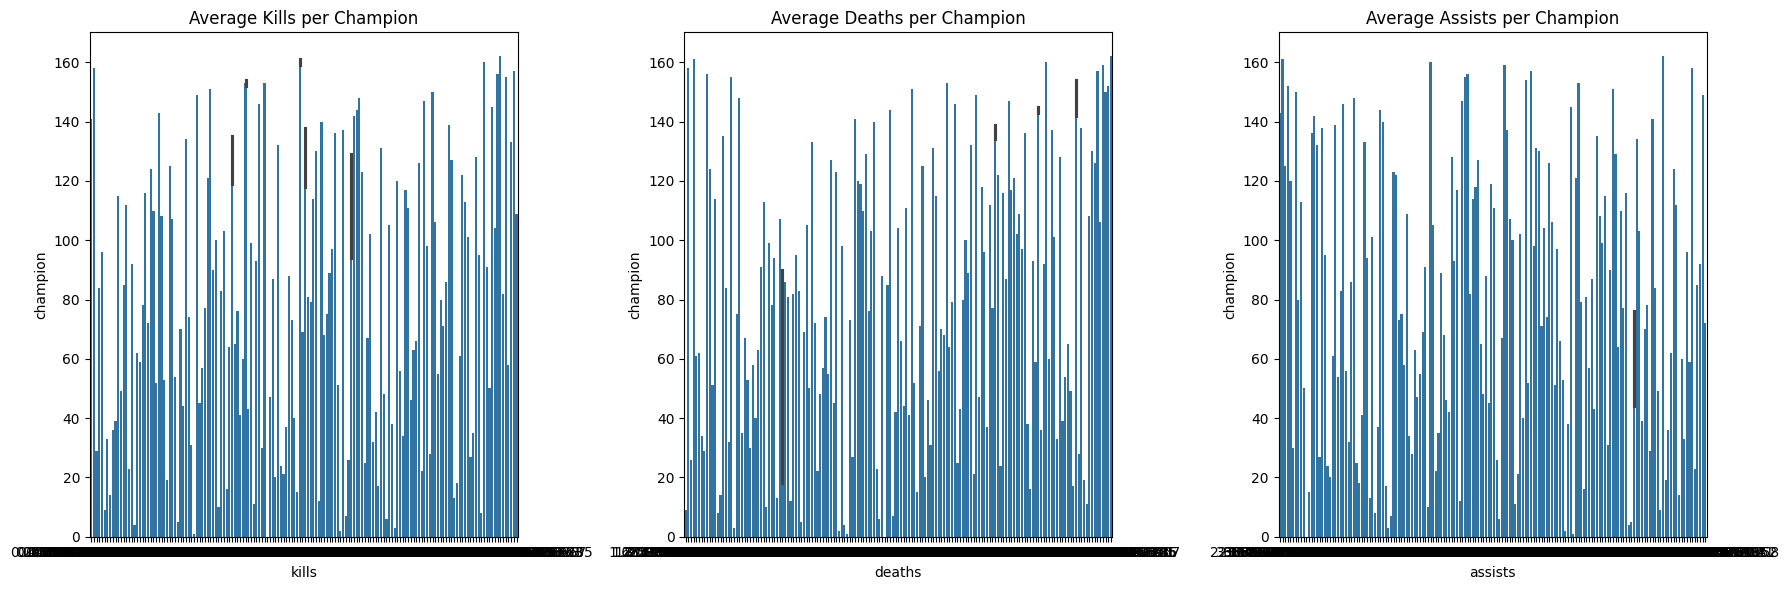

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 각 챔피언에 대해 'kills', 'deaths', 'assists'의 평균을 구함
champion_stats = league_data.groupby('champion')[['kills', 'deaths', 'assists']].mean().reset_index()

# 그래프를 그리기 위해 'kills', 'deaths', 'assists'에 대해 각각 차례로 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 'kills' 그래프
sns.barplot(x='kills', y='champion', data=champion_stats, ax=axes[0])
axes[0].set_title('Average Kills per Champion')

# 'deaths' 그래프
sns.barplot(x='deaths', y='champion', data=champion_stats, ax=axes[1])
axes[1].set_title('Average Deaths per Champion')

# 'assists' 그래프
sns.barplot(x='assists', y='champion', data=champion_stats, ax=axes[2])
axes[2].set_title('Average Assists per Champion')

plt.tight_layout()
plt.show()

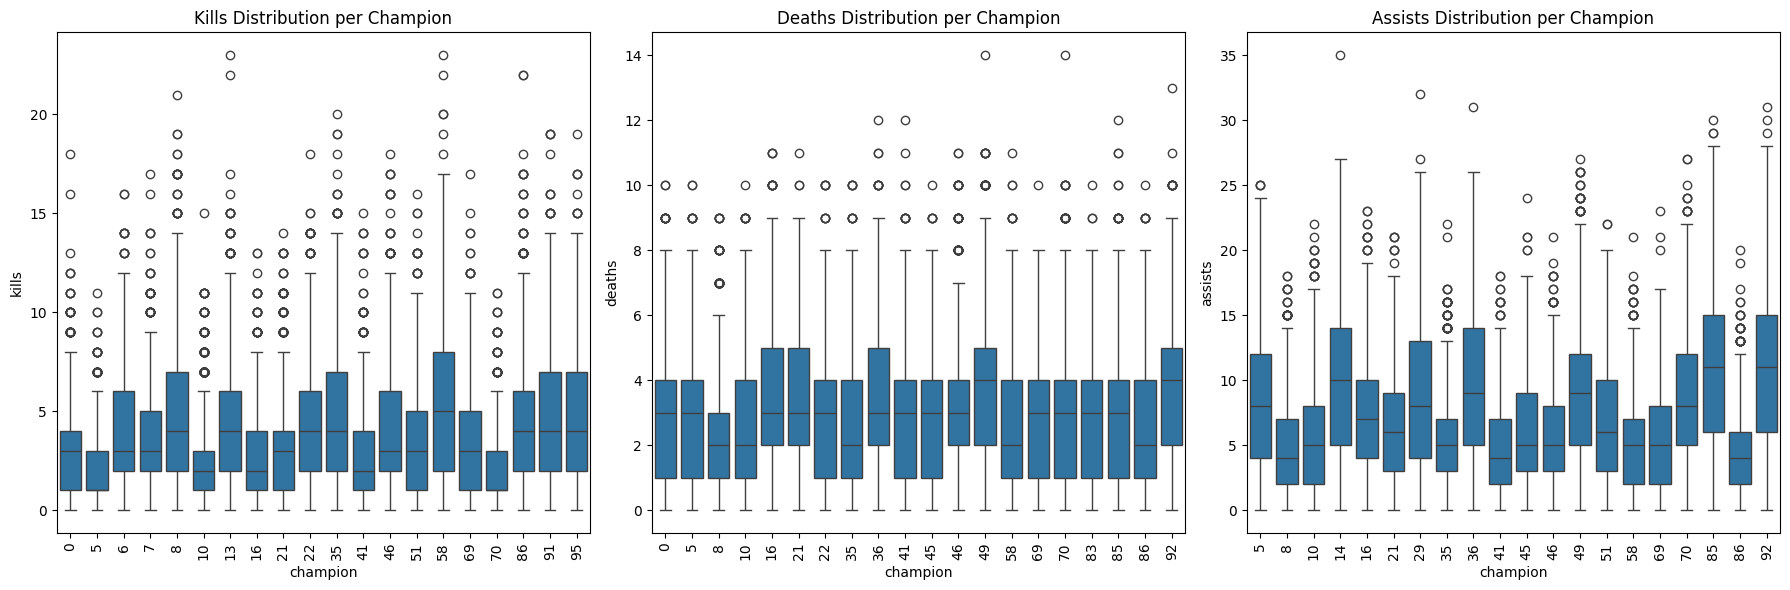

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# 킬, 데스, 어시스트 각각에 대해 상위 20개 챔피언을 선택
top_kills_champions = league_data.groupby('champion').agg({'kills': 'sum'}).sort_values('kills', ascending=False).head(20)
top_deaths_champions = league_data.groupby('champion').agg({'deaths': 'sum'}).sort_values('deaths', ascending=False).head(20)
top_assists_champions = league_data.groupby('champion').agg({'assists': 'sum'}).sort_values('assists', ascending=False).head(20)

# 각각의 지표에 대해 상위 20개 챔피언의 데이터만 필터링
filtered_kills_data = league_data[league_data['champion'].isin(top_kills_champions.index)]
filtered_deaths_data = league_data[league_data['champion'].isin(top_deaths_champions.index)]
filtered_assists_data = league_data[league_data['champion'].isin(top_assists_champions.index)]

# 박스 플롯을 그릴 준비
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 'kills' 박스 플롯
sns.boxplot(x='champion', y='kills', data=filtered_kills_data, ax=axes[0])
axes[0].set_title('Kills Distribution per Champion')
axes[0].tick_params(axis='x', rotation=90)  # x축 레이블 90도 회전

# 'deaths' 박스 플롯
sns.boxplot(x='champion', y='deaths', data=filtered_deaths_data, ax=axes[1])
axes[1].set_title('Deaths Distribution per Champion')
axes[1].tick_params(axis='x', rotation=90)  # x축 레이블 90도 회전

# 'assists' 박스 플롯
sns.boxplot(x='champion', y='assists', data=filtered_assists_data, ax=axes[2])
axes[2].set_title('Assists Distribution per Champion')
axes[2].tick_params(axis='x', rotation=90)  # x축 레이블 90도 회전

plt.tight_layout()
plt.show()



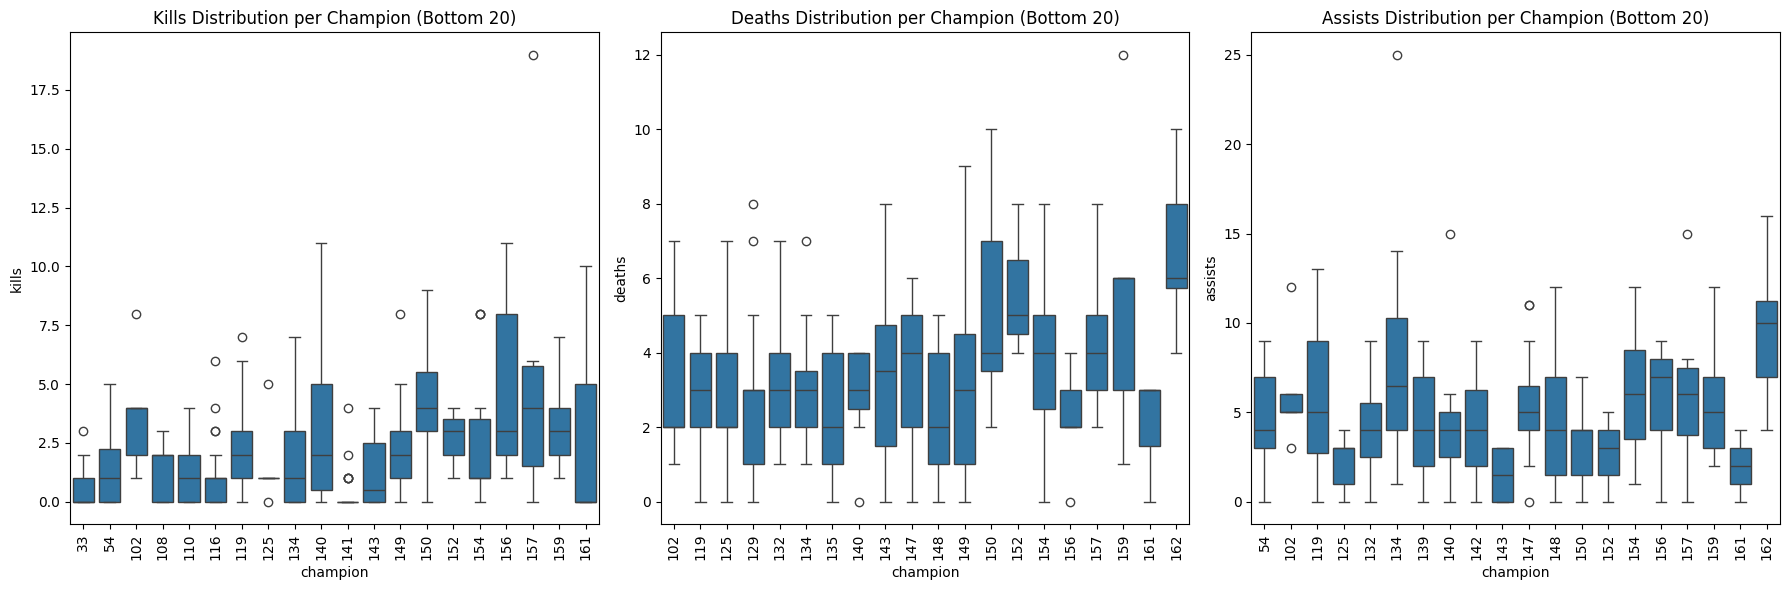

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# 킬, 데스, 어시스트 각각에 대해 하위 20개 챔피언을 선택
bottom_kills_champions = league_data.groupby('champion').agg({'kills': 'sum'}).sort_values('kills', ascending=True).head(20)
bottom_deaths_champions = league_data.groupby('champion').agg({'deaths': 'sum'}).sort_values('deaths', ascending=True).head(20)
bottom_assists_champions = league_data.groupby('champion').agg({'assists': 'sum'}).sort_values('assists', ascending=True).head(20)

# 각각의 지표에 대해 하위 20개 챔피언의 데이터만 필터링
filtered_kills_data = league_data[league_data['champion'].isin(bottom_kills_champions.index)]
filtered_deaths_data = league_data[league_data['champion'].isin(bottom_deaths_champions.index)]
filtered_assists_data = league_data[league_data['champion'].isin(bottom_assists_champions.index)]

# 박스 플롯을 그릴 준비
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 'kills' 박스 플롯
sns.boxplot(x='champion', y='kills', data=filtered_kills_data, ax=axes[0])
axes[0].set_title('Kills Distribution per Champion (Bottom 20)')
axes[0].tick_params(axis='x', rotation=90)  # x축 레이블 90도 회전

# 'deaths' 박스 플롯
sns.boxplot(x='champion', y='deaths', data=filtered_deaths_data, ax=axes[1])
axes[1].set_title('Deaths Distribution per Champion (Bottom 20)')
axes[1].tick_params(axis='x', rotation=90)  # x축 레이블 90도 회전

# 'assists' 박스 플롯
sns.boxplot(x='champion', y='assists', data=filtered_assists_data, ax=axes[2])
axes[2].set_title('Assists Distribution per Champion (Bottom 20)')
axes[2].tick_params(axis='x', rotation=90)  # x축 레이블 90도 회전

plt.tight_layout()
plt.show()


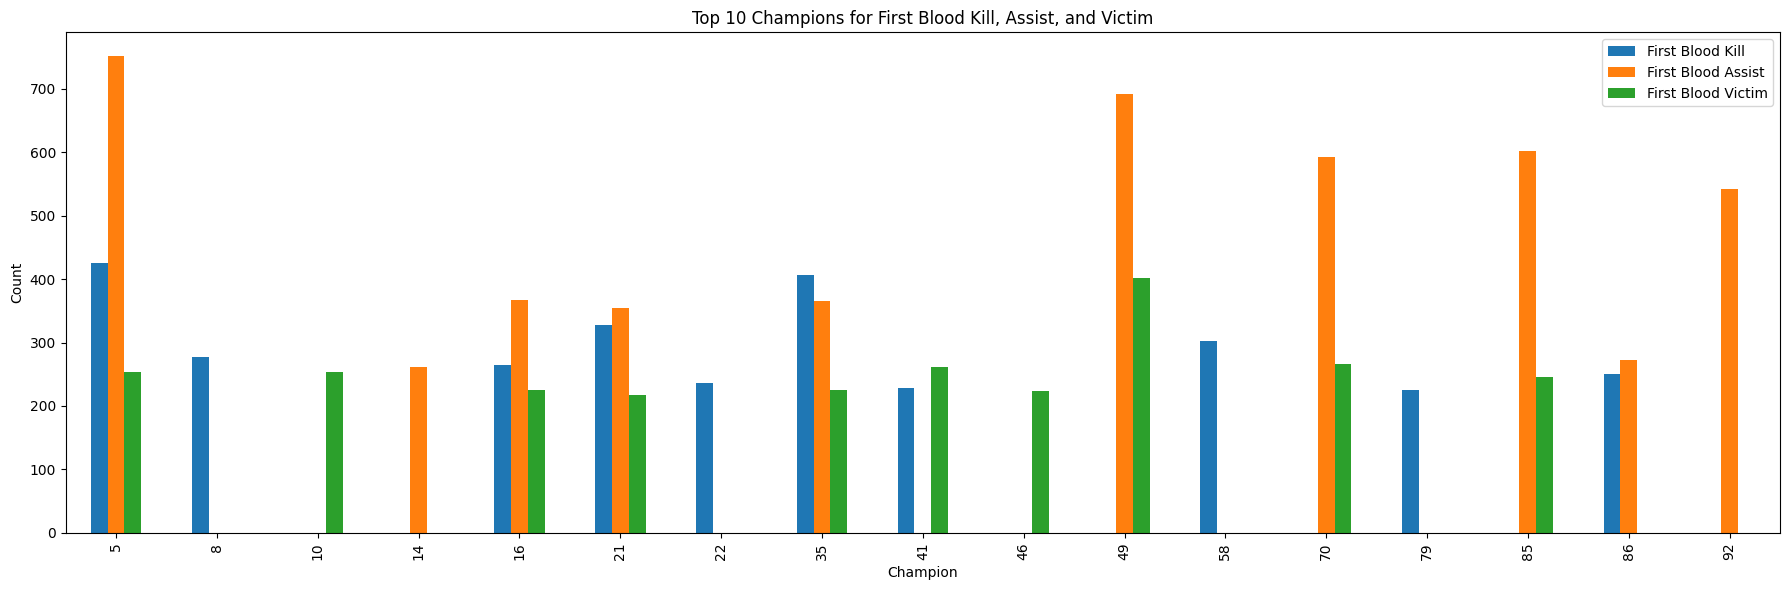

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# 퍼스트블러드킬, 퍼스트블러드어시스트, 퍼스트블러드희생자 각각에 대해 상위 10개 챔피언을 선택
top_firstbloodkill_champions = league_data.groupby('champion').agg({'firstbloodkill': 'sum'}).sort_values('firstbloodkill', ascending=False).head(10)
top_firstbloodassist_champions = league_data.groupby('champion').agg({'firstbloodassist': 'sum'}).sort_values('firstbloodassist', ascending=False).head(10)
top_firstbloodvictim_champions = league_data.groupby('champion').agg({'firstbloodvictim': 'sum'}).sort_values('firstbloodvictim', ascending=False).head(10)

# 각 챔피언에 대해 퍼스트블러드킬, 퍼스트블러드어시스트, 퍼스트블러드희생자 발생 횟수 카운트
firstbloodkill_counts = league_data[league_data['champion'].isin(top_firstbloodkill_champions.index)].groupby('champion')['firstbloodkill'].sum()
firstbloodassist_counts = league_data[league_data['champion'].isin(top_firstbloodassist_champions.index)].groupby('champion')['firstbloodassist'].sum()
firstbloodvictim_counts = league_data[league_data['champion'].isin(top_firstbloodvictim_champions.index)].groupby('champion')['firstbloodvictim'].sum()

# 데이터 프레임으로 합침
firstblood_data = pd.DataFrame({
    'First Blood Kill': firstbloodkill_counts,
    'First Blood Assist': firstbloodassist_counts,
    'First Blood Victim': firstbloodvictim_counts
})

# 막대그래프를 그릴 준비
firstblood_data.plot(kind='bar', figsize=(18, 6))

# 그래프 제목 및 레이블 설정
plt.title('Top 10 Champions for First Blood Kill, Assist, and Victim')
plt.xlabel('Champion')
plt.ylabel('Count')
plt.xticks(rotation=90)

# 그래프 출력
plt.tight_layout()
plt.show()
